In [1]:
import os
os.environ['HSA_OVERRIDE_GFX_VERSION'] = '10.3.0'

In [8]:
from torch.utils.data import Dataset
import torch;
from typing import Tuple
from PIL import Image
from pathlib import Path
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

KADID10K_PATH = Path("/home/mrpaw/Documents/mag_databases/KADID-10k/kadid10k")

class Kadid10kDataset(Dataset):
  def __init__(self, path:Path, train:bool, transform:torch.nn.Module = None, testSize = 0.2, normalize = True) -> None:
    super().__init__()
    self.train = train
    self.path = path
    self.dataPath = path / "dmos.csv"
    self.imagesPath = path / "images"
    self.normalize = normalize

    scores = pd.read_csv(self.dataPath)
    self.mos = scores["dmos"].values
    self.images = scores["dist_img"].values

    length = len(self.mos)

    self.indexes = np.arange(start=0, stop=length) 


    i_train, i_test = train_test_split(self.indexes, test_size=testSize, random_state=21, shuffle=True)

    self.indexes = i_train if train else i_test
    
    self.transform = transform

  def __len__(self):
    return len(self.indexes)  

  def __getitem__(self, index) -> Tuple[torch.Tensor, torch.Tensor]:
    i = self.indexes[index]
    img_path = self.imagesPath / self.images[i]
    mos = self.mos[i]

    # print(img_path)
    img = Image.open(img_path)

    if(self.transform != None):
      img = self.transform(img)

    if(self.normalize):
      mos = mos / 5.0

    mos = torch.tensor(mos)

    return (img, mos)

In [9]:
dataSet = Kadid10kDataset(KADID10K_PATH, True)

<class 'torch.Tensor'>
tensor(0.8660, dtype=torch.float64)


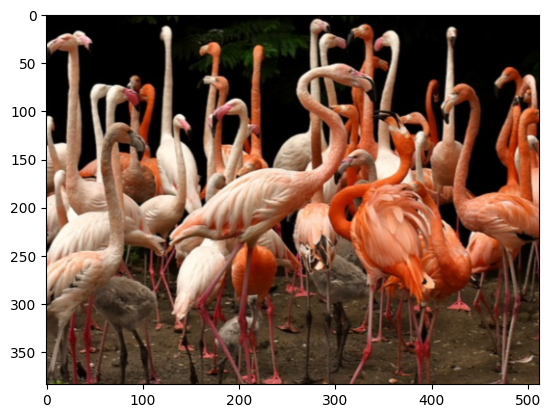

In [13]:
import matplotlib.pyplot as plt
img, mos = dataSet[100]
print(type(mos))
print(mos)
plt.imshow(img)